In [6]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Excel file and data on 'WTD_data' page
file_path = '/Users/jiamanli/Desktop/RCG Analyst, Revenue Strategy - Case Study/Track_case_study_data.xlsx'
df = pd.read_excel(file_path, sheet_name='WTD_data')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95219 entries, 0 to 95218
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   run_date           95219 non-null  datetime64[ns]
 1   calendar_week      95219 non-null  datetime64[ns]
 2   ship               95219 non-null  object        
 3   sail_date          95219 non-null  object        
 4   sail_year          95219 non-null  int64         
 5   sail_month         95219 non-null  int64         
 6   meta_product_code  95219 non-null  object        
 7   pax_build          95219 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 5.8+ MB


In [12]:
# Correct data format
df['sail_date'] = pd.to_datetime(df['sail_date'])
df['meta_product_code'] = df['meta_product_code'].astype('category')

# Add 'weekday' column based on run_date
df['weekday'] = df['run_date'].dt.day_name()

# Total records by weekday
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = df['weekday'].value_counts().reindex(weekday_order, fill_value=0)
print(weekday_counts)

Monday       16251
Tuesday      16251
Wednesday    16251
Thursday     16252
Friday       16251
Saturday         0
Sunday       13963
Name: weekday, dtype: int64


In [4]:
# Check duplicates and missing values
duplicate_count = df.duplicated().sum()
missing_per_column = df.isnull().sum()

print("Data Quality Check")
print(f"Duplicate rows: {duplicate_count}")
print("Missing values per column:")
print(missing_per_column)

Data Quality Check
Duplicate rows: 0
Missing values per column:
run_date             0
calendar_week        0
ship                 0
sail_date            0
sail_year            0
sail_month           0
meta_product_code    0
pax_build            0
weekday              0
dtype: int64


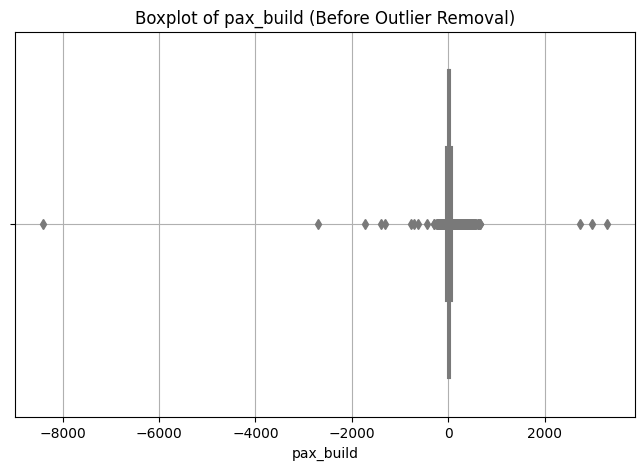

In [7]:
# Boxplot to show the abnormal data
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['pax_build'], color="lightblue")
plt.title('Boxplot of Pax Build (Before Outlier Removal)')
plt.xlabel('Pax Build')
plt.grid(True)
plt.show()

In [8]:
# Remove outliers from 'pax_build' using the IQR method
Q1 = df['pax_build'].quantile(0.25)  
Q3 = df['pax_build'].quantile(0.75)  
IQR = Q3 - Q1  

# Filter the dataframe to exclude outliers
df_clean = df[(df['pax_build'] >= Q1 - 1.5 * IQR) & (df['pax_build'] <= Q3 + 1.5 * IQR)]
original_count = len(df)
cleaned_count = len(df_clean)
removed_count = original_count - cleaned_count
removed_count_ratio = removed_count/original_count*100

print("Outlier Removal Summary:")
print(f"Total records before cleaning: {original_count}")
print(f"Total records after cleaning:  {cleaned_count}")
print(f"Total outliers removed:        {removed_count}")
print(f"Total outliers %:        {removed_count_ratio:.2f}%")

Outlier Removal Summary:
Total records before cleaning: 95219
Total records after cleaning:  86819
Total outliers removed:        8400
Total outliers %:        8.82%


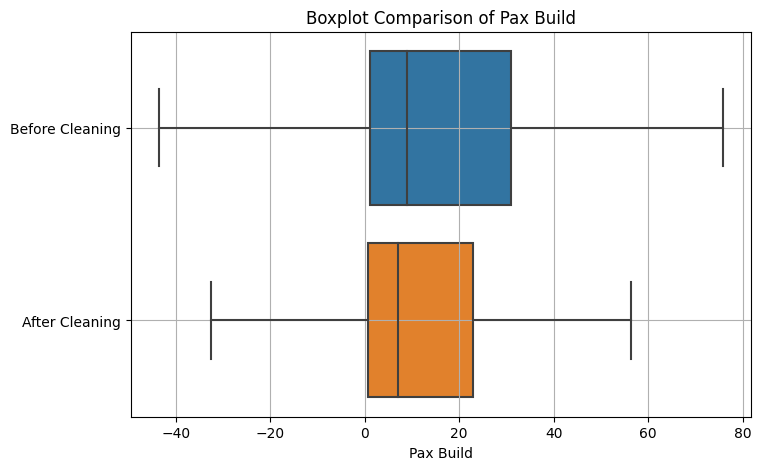

In [10]:
# Boxplot comparison of pax_build before and after cleanning
plt.figure(figsize=(8, 5))
sns.boxplot(data=[df['pax_build'], df_clean['pax_build']], orient='h', showfliers=False)
plt.yticks([0, 1], ['Before Cleaning', 'After Cleaning'])
plt.title('Boxplot Comparison of Pax Build')
plt.xlabel('Pax Build')
plt.grid(True)
plt.show()

In [14]:
# Show cleaned data
df_clean.head(10)

,run_date,calendar_week,ship,sail_date,sail_year,sail_month,meta_product_code,pax_build,weekday
1,2024-12-08,2024-12-13,SY,2025-03-02 00:00:00+00:00,2025,3,7N CARIBBEAN,0.525550,Sunday
2,2024-12-08,2024-12-13,UT,2025-07-18 00:00:00+00:00,2025,7,SHORT CARIBBEAN,3.986292,Sunday
3,2024-12-08,2024-12-13,EN,2025-09-04 00:00:00+00:00,2025,9,SHORT CARIBBEAN,1.099793,Sunday
4,2024-12-08,2024-12-13,IC,2027-04-10 00:00:00+00:00,2027,4,7N CARIBBEAN,0.730949,Sunday
6,2024-12-08,2024-12-13,UT,2024-12-30 00:00:00+00:00,2024,12,SHORT CARIBBEAN,4.608766,Sunday
7,2024-12-08,2024-12-13,ID,2025-07-20 00:00:00+00:00,2025,7,EUROPE,6.258185,Sunday
8,2024-12-08,2024-12-13,UT,2025-09-05 00:00:00+00:00,2025,9,SHORT CARIBBEAN,-1.875163,Sunday
9,2024-12-08,2024-12-13,RH,2024-12-15 00:00:00+00:00,2024,12,7N CARIBBEAN,2.853934,Sunday
10,2024-12-08,2024-12-13,HM,2025-06-15 00:00:00+00:00,2025,6,7N CARIBBEAN,23.430896,Sunday
11,2024-12-08,2024-12-13,EN,2026-01-31 00:00:00+00:00,2026,2,SHORT CARIBBEAN,0.194890,Sunday


In [ ]:
# Export cleaned data for Power BI analysis
output_path = '/Users/jiamanli/Desktop/RCG Analyst, Revenue Strategy - Case Study/cleaned_pax_build_data.csv'
df_clean.to_csv(output_path, index=False)

print("Cleaned dataset exported successfully!")